In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df0 = pd.read_csv("hf://datasets/daniilak/Russia_Real_Estate_2018_2021/data.csv", nrows=100000)

In [2]:
df0 = df0.drop(['date', 'time'], axis=1)
print(df0.columns)

Index(['price', 'geo_lat', 'geo_lon', 'region', 'building_type', 'level',
       'levels', 'rooms', 'area', 'kitchen_area', 'object_type'],
      dtype='object')


In [3]:
df0 = df0[df0['price'] > 0]
df0=df0.dropna()
df0=df0.drop_duplicates()
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83725 entries, 0 to 99974
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          83725 non-null  int64  
 1   geo_lat        83725 non-null  float64
 2   geo_lon        83725 non-null  float64
 3   region         83725 non-null  int64  
 4   building_type  83725 non-null  int64  
 5   level          83725 non-null  int64  
 6   levels         83725 non-null  int64  
 7   rooms          83725 non-null  int64  
 8   area           83725 non-null  float64
 9   kitchen_area   83725 non-null  float64
 10  object_type    83725 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 7.7 MB


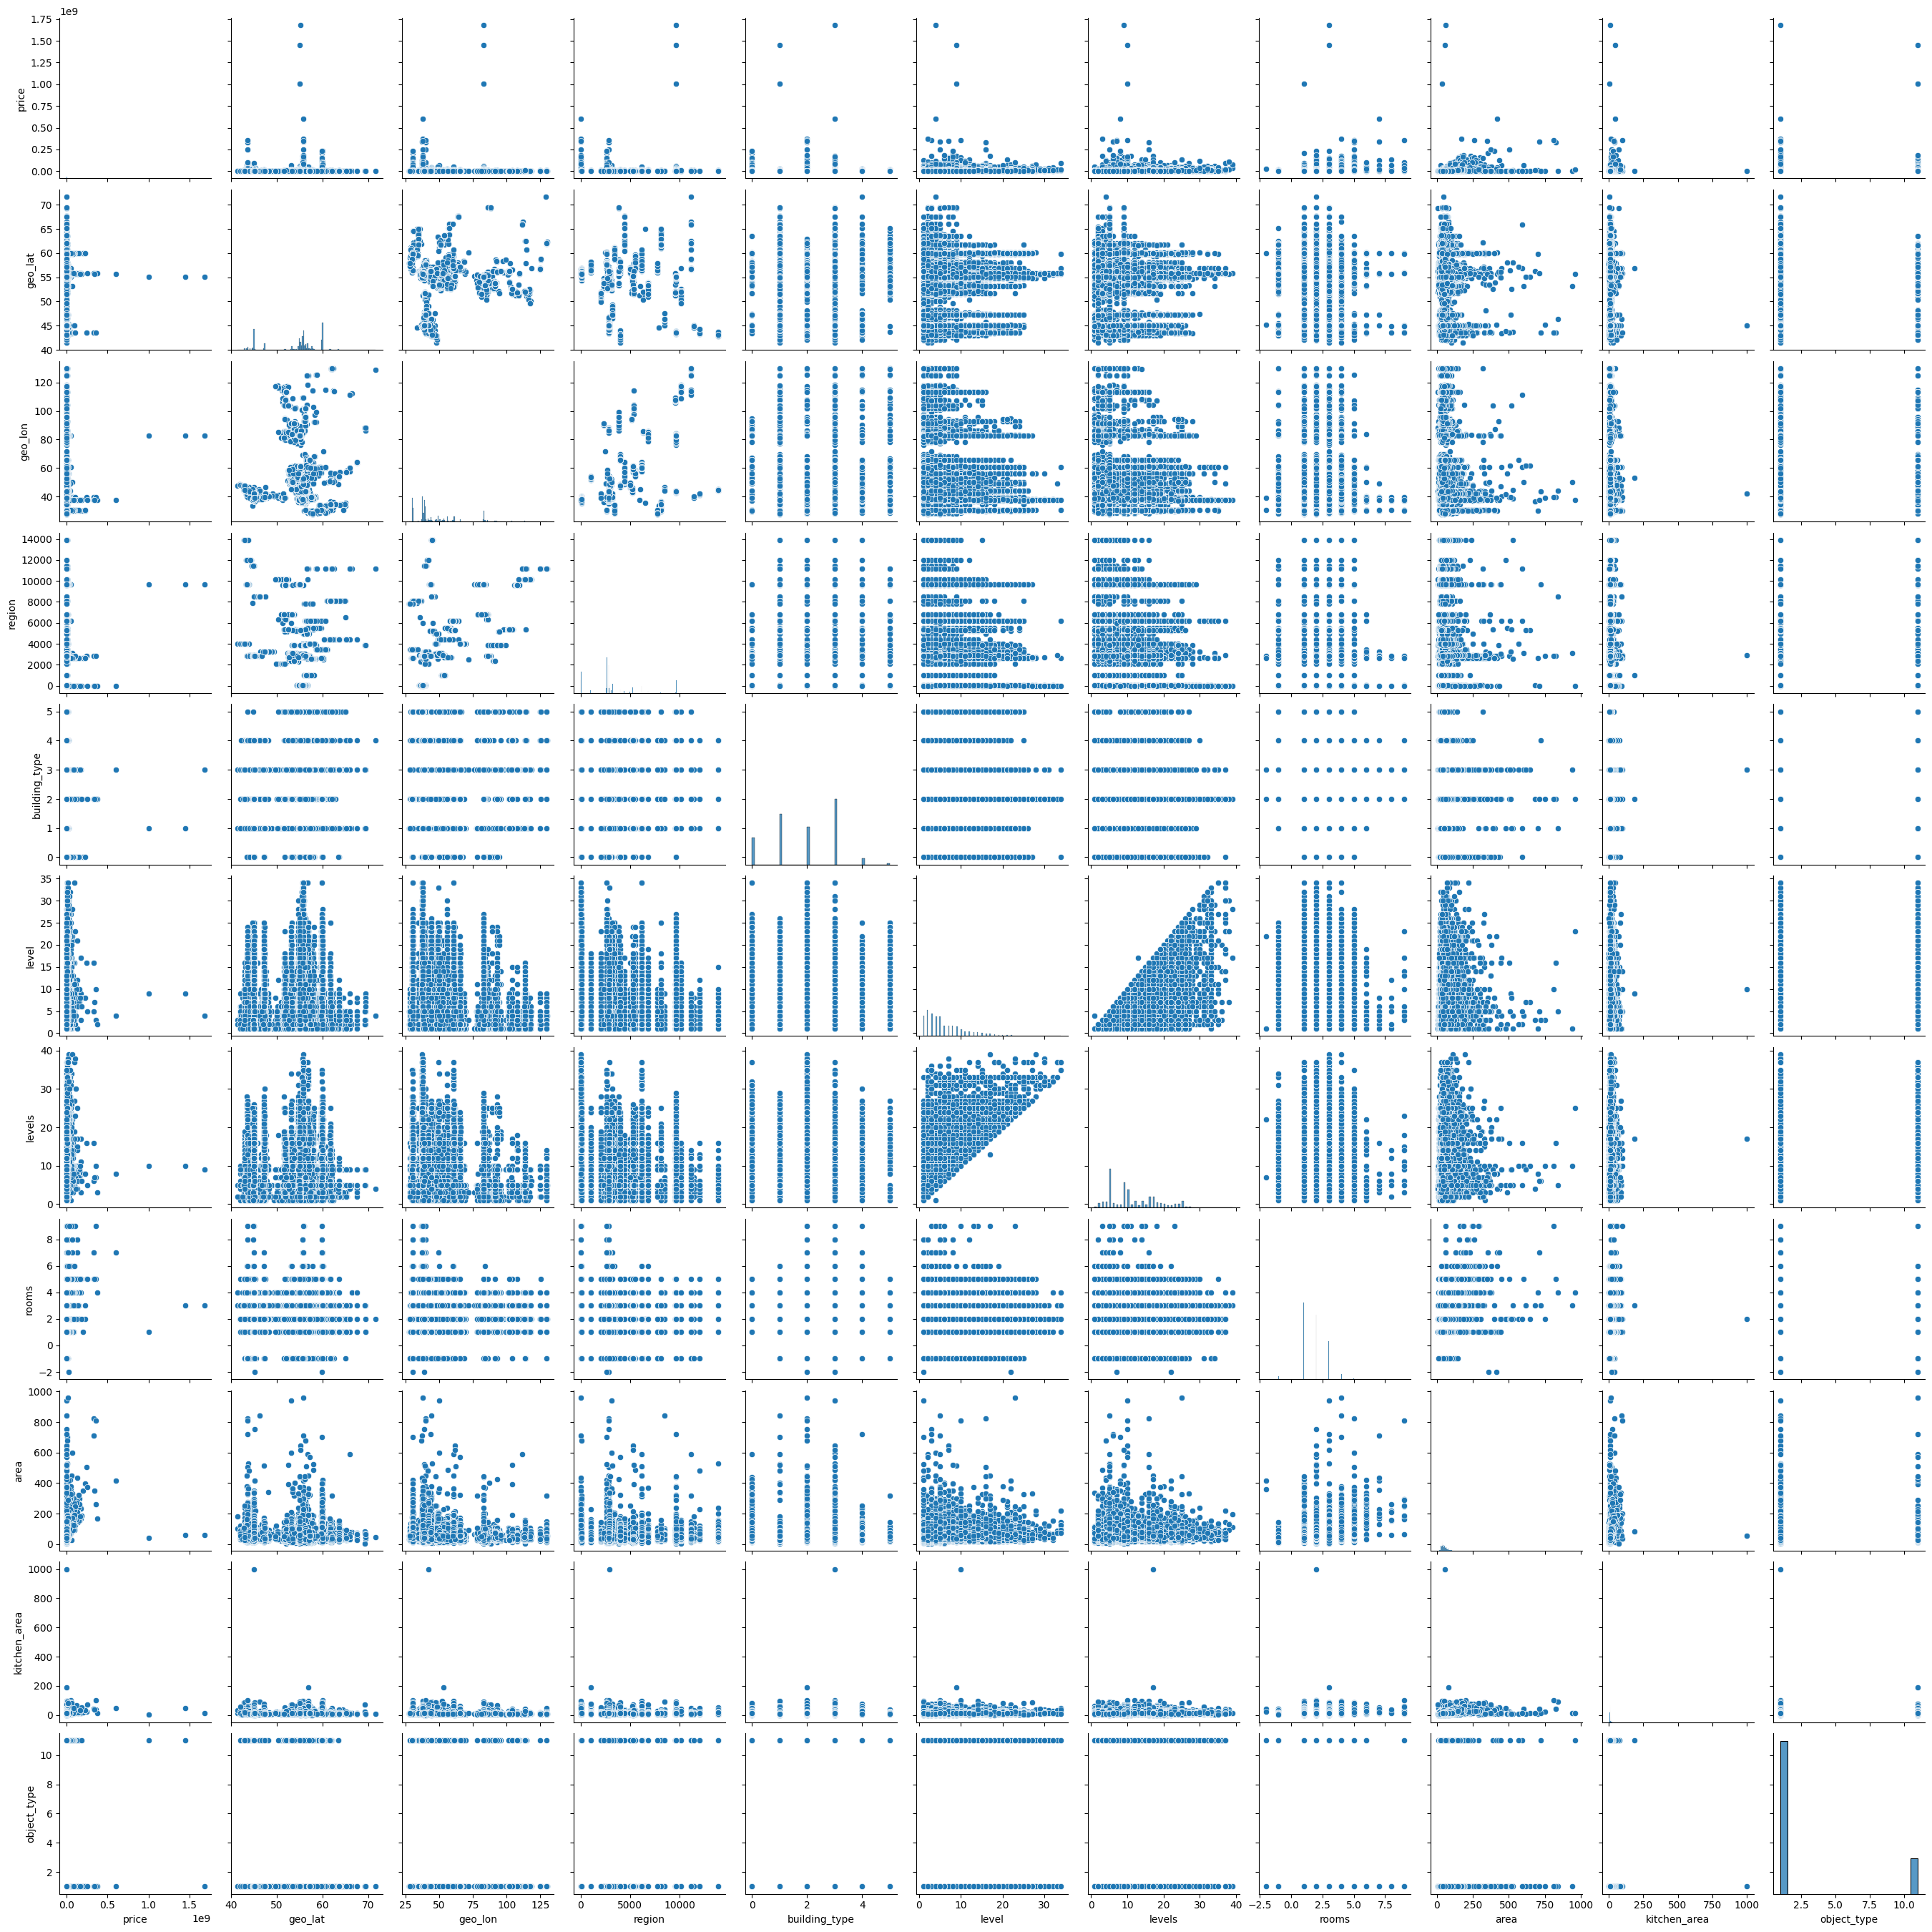

In [4]:
sns.pairplot(df0)

In [5]:
from sklearn.model_selection import train_test_split
x = df0.drop(['price'], axis=1)
y= df0['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
train_data = X_train.join(y_train)

In [8]:
train_data

,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,price
43165,45.040216,38.975996,2843,0,4,5,1,44.00,12.00,1,1669000
97690,45.011230,41.920204,2900,3,10,12,1,47.00,10.00,1,2150000
87113,45.042400,38.994420,2843,2,8,24,1,42.50,11.00,1,3100000
82964,54.964437,82.945007,9654,0,25,26,3,70.42,19.93,11,4650000
3466,55.919615,37.746441,81,2,14,16,1,38.00,9.00,1,6100000
...,...,...,...,...,...,...,...,...,...,...,...
569,55.013916,83.003290,9654,1,1,10,1,39.00,5.00,11,1250000
76498,59.882717,30.451298,2661,0,2,23,1,59.80,11.10,1,7120386
53152,55.717741,37.675217,3,1,1,14,2,52.90,11.40,1,10000000
34799,45.086123,39.007715,2843,0,1,6,1,18.00,1.00,1,550000


array([[<Axes: title={'center': 'geo_lat'}>,
        <Axes: title={'center': 'geo_lon'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'building_type'}>,
        <Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'levels'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'kitchen_area'}>],
       [<Axes: title={'center': 'object_type'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

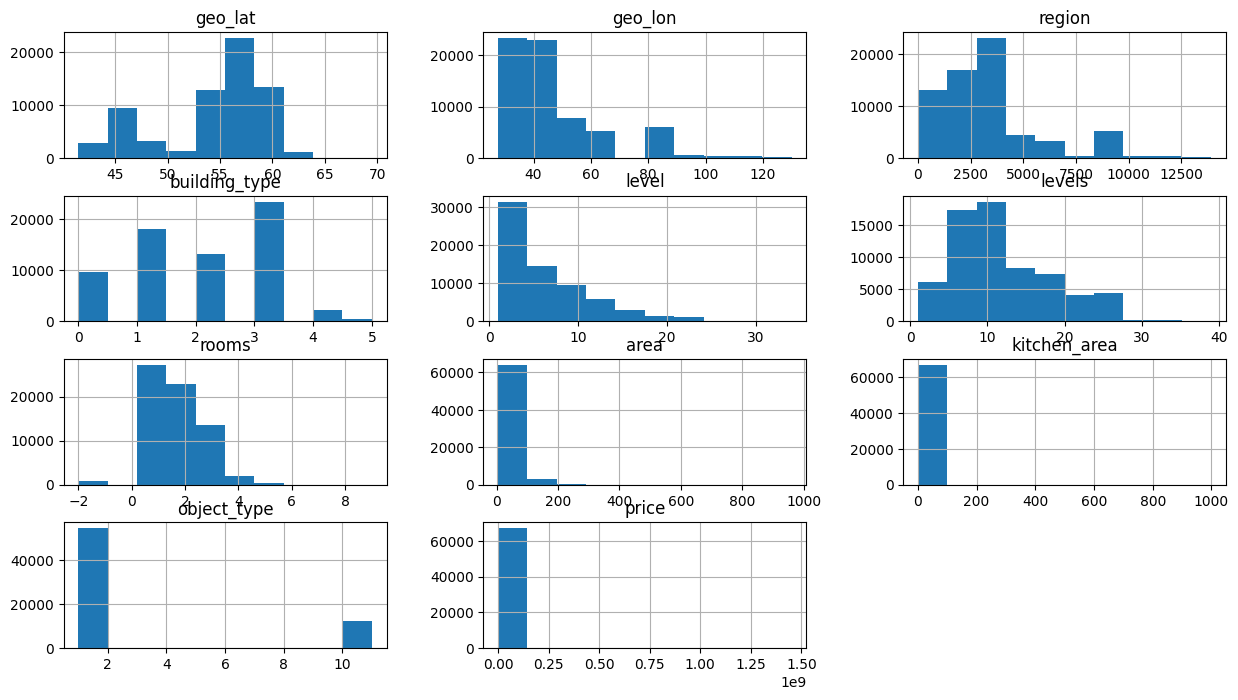

In [9]:
train_data.hist(figsize=(15,8))

<Axes: >

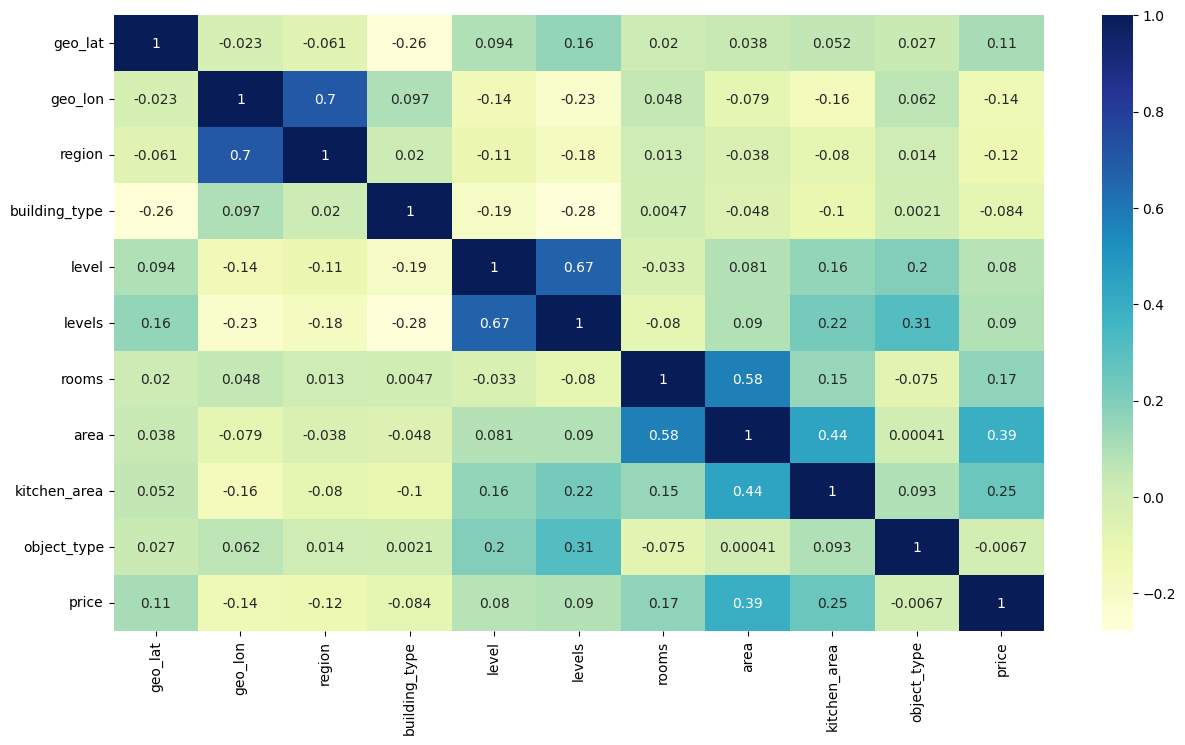

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

essayons de trouver un modele qui donnera de bons resultats 

In [23]:
#regession lineaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

print("the score is: ",linear_model.score(X_train, y_train))


the score is:  0.09139624104692157


In [24]:
#regression lineaire avec des variables normalisées
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)


print("the score is" ,linear_model.score(X_train_scaled, y_train))

the score is 0.09139624104692134


In [25]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


print("the score is: ", rf_model.score(X_train, y_train))


the score is:  0.8635456968197609


In [26]:
#gradiant boosting regression
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

gb_model.score(X_train, y_train)


0.5600401410839316

In [ ]:
#from sklearn.svm import SVR

#svr_model = SVR(kernel='rbf')
#svr_model.fit(X_train, y_train)

#y_pred_svr = svr_model.predict(X_test)

#svr_model.score(X_train, y_train)

In [ ]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("the score is: ", knn_model.score(X_train, y_train))


the score is:  0.44015306669078424


In [ ]:
#reseau de neuronnes
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

print("le score est: ",nn_model.score(X_train, y_train))

le score est:  0.11332332360640995


c:\Users\souma\Documents\real estate price prediction website\venv_prediction\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


time to improve some models

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10,20]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
print("the score is:  ", grid_search.score(X_train, y_train))

NameError: name 'X_train_scaled' is not defined

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

mse = mean_squared_error(y_test, y_pred)
print(f'Positive MSE: {mse}')
print("the score is:  ", grid_search.score(X_train_scaled, y_train))


NameError: name 'GridSearchCV' is not defined